정신건강과_음악의상관관계 csv 읽기

In [46]:
#정신건강과_음악의상관관계 

import pandas as pd

# 파일 경로
file_path = './data/정신건강과_음악의상관관계.csv'

# CSV 파일 읽기
data = pd.read_csv(file_path)

# 데이터 확인
data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

(            Timestamp   Age Primary streaming service  Hours per day  \
 0  8/27/2022 19:29:02  18.0                   Spotify            3.0   
 1  8/27/2022 19:57:31  63.0                   Pandora            1.5   
 2  8/27/2022 21:28:18  18.0                   Spotify            4.0   
 3  8/27/2022 21:40:40  61.0             YouTube Music            2.5   
 4  8/27/2022 21:54:47  18.0                   Spotify            4.0   
 
   While working Instrumentalist Composer         Fav genre Exploratory  \
 0           Yes             Yes      Yes             Latin         Yes   
 1           Yes              No       No              Rock         Yes   
 2            No              No       No  Video game music          No   
 3           Yes              No      Yes              Jazz         Yes   
 4           Yes              No       No               R&B         Yes   
 
   Foreign languages  ...  Frequency [R&B]  Frequency [Rap] Frequency [Rock]  \
 0               Yes  ...   

In [47]:
# 음악 장르 빈도 데이터를 숫자로 변환 (Ordinal Encoding)
frequency_mapping = {
    "Never": 0,
    "Rarely": 1,
    "Sometimes": 2,
    "Frequently": 3,
    "Very frequently": 4
}

# 변환할 컬럼 리스트 (Frequency 관련 컬럼만 선택)
frequency_columns = [col for col in data.columns if "Frequency" in col]

# 문자열 데이터를 숫자로 변환
for col in frequency_columns:
    data[col] = data[col].map(frequency_mapping)

# 숫자로 변환된 데이터 확인
data[frequency_columns].head()


,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music]
0,1,0,1,0,0,2,0,4,4,1,0,4,2,4,0,2
1,2,0,0,1,2,1,4,1,2,1,0,2,2,1,4,1
2,0,0,4,0,0,1,1,4,0,2,2,1,0,1,1,4
3,2,0,0,1,2,0,4,2,4,2,0,2,2,0,0,0
4,0,0,1,0,1,4,0,4,2,2,0,2,4,4,0,1


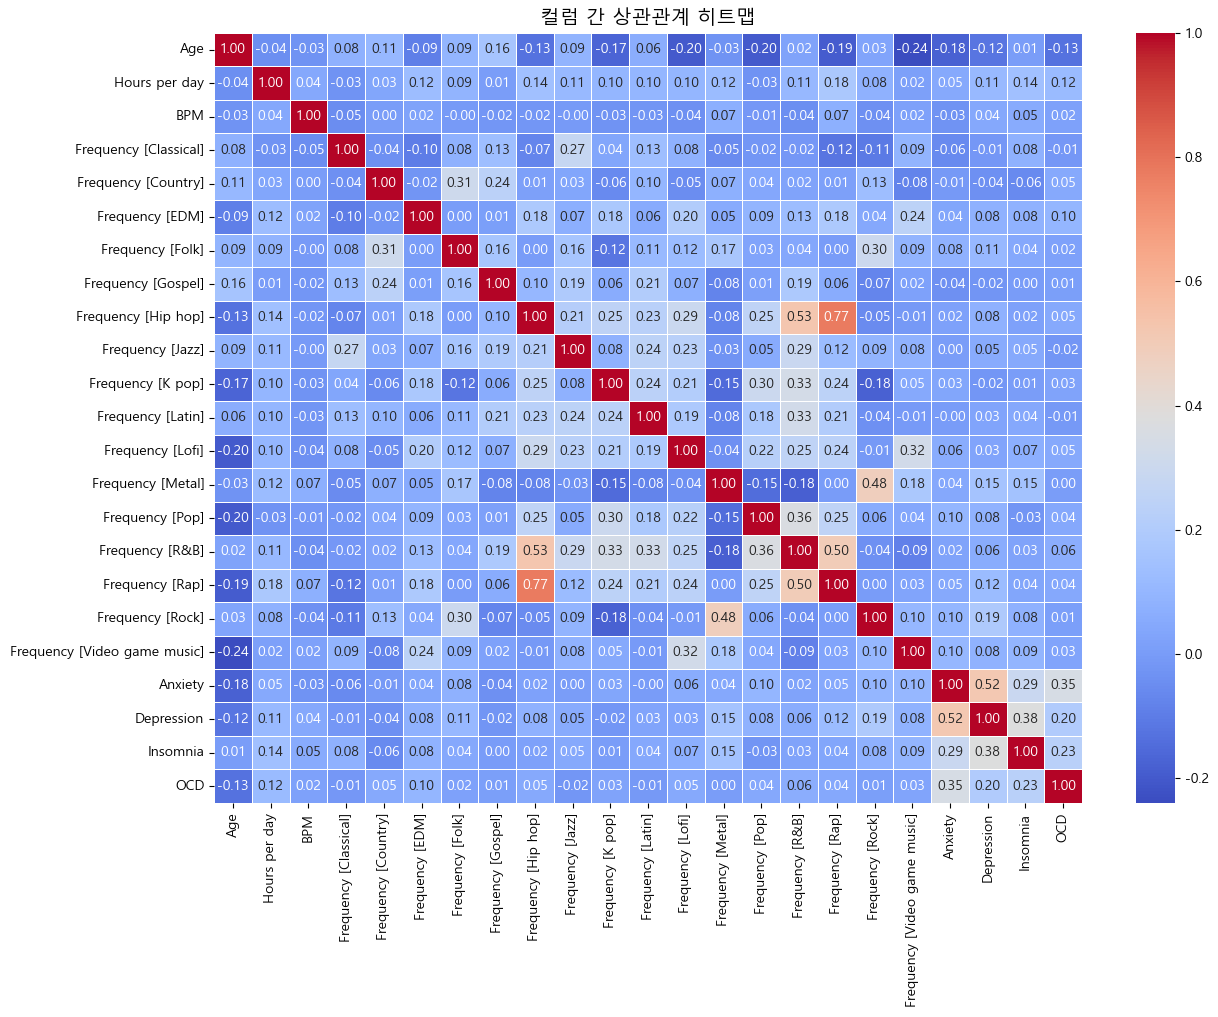

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
# 상관관계 히트맵 생성 함수

#한글폰트 지정
plt.rc('font', family='Malgun Gothic') 
%matplotlib inline

def correlation_matrix(df):
    """
    입력된 데이터프레임의 상관관계 행렬을 히트맵으로 시각화하는 함수.
    
    :param df: pandas DataFrame (수치형 데이터 포함)
    """
    plt.figure(figsize=(14, 10))  # 그래프 크기 설정
    correlation = df.corr()  # 상관관계 계산
    
    # 히트맵 생성
    sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    
    plt.title("컬럼 간 상관관계 히트맵", fontsize=14)  # 제목 설정
    plt.show()

# 숫자형 컬럼만 선택 (상관관계 분석에 필요한 컬럼만 유지)
numeric_columns = [col for col in data.columns if data[col].dtype in ['int64', 'float64']]
df_numeric = data[numeric_columns]

# 상관관계 히트맵 출력
correlation_matrix(df_numeric)


음악 장르 청취 빈도와 정신 건강 지표 간의 상관관계

음악 장르 청취 빈도와 정신 건강 지표 간 상관계수:
                               Anxiety  Depression  Insomnia       OCD
Frequency [Classical]        -0.047259   -0.008253  0.076474 -0.007941
Frequency [Country]          -0.009375   -0.043484 -0.051349  0.059096
Frequency [EDM]               0.042847    0.090776  0.081871  0.099119
Frequency [Folk]              0.092154    0.112735  0.043793  0.028344
Frequency [Gospel]           -0.038104   -0.018077  0.003451  0.012583
Frequency [Hip hop]           0.023114    0.098920  0.018582  0.045090
Frequency [Jazz]              0.002204    0.052682  0.034135 -0.022568
Frequency [K pop]             0.032948   -0.012201  0.008124  0.024944
Frequency [Latin]            -0.008970    0.034339  0.052427 -0.016245
Frequency [Lofi]              0.078485    0.043346  0.064956  0.059212
Frequency [Metal]             0.066670    0.176564  0.160666  0.007286
Frequency [Pop]               0.104341    0.082259 -0.021197  0.038841
Frequency [R&B]               0.025317    0.063

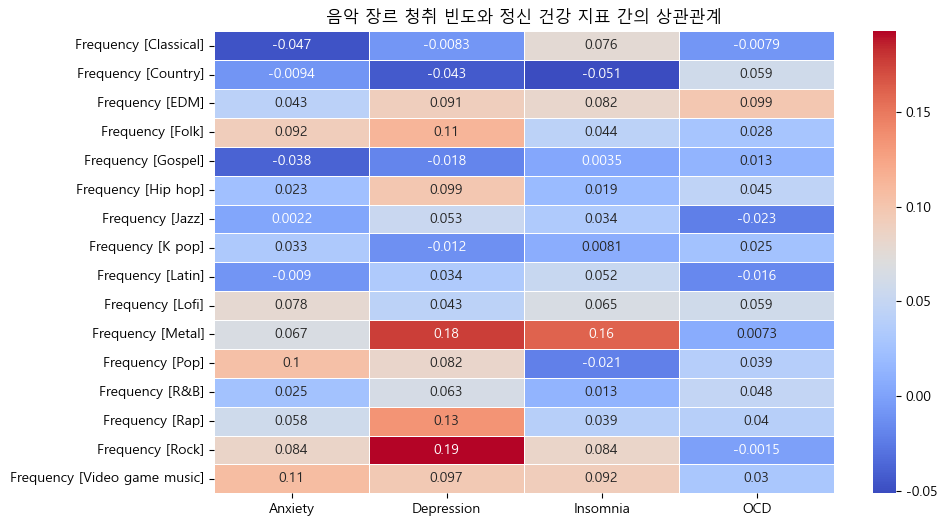

In [49]:
#음악 장르 청취 빈도와 정신 건강 지표 간의 상관관계
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# 청취 빈도를 수치화하기 위한 매핑
frequency_mapping = {
    "Never": 0,
    "Rarely": 1,
    "Sometimes": 2,
    "Very frequently": 3
}

# 데이터 불러오기 (예제: data.csv 파일)
data = pd.read_csv("./data/정신건강과_음악의상관관계.csv")  # 데이터 파일명을 실제 파일명으로 변경하세요.

# 장르 관련 컬럼 필터링 및 수치화
genre_columns = [col for col in data.columns if "Frequency" in col]
data_numeric = data.copy()

for col in genre_columns:
    data_numeric[col] = data[col].map(frequency_mapping)

# 정신 건강 관련 지표 선택
mental_health_columns = ["Anxiety", "Depression", "Insomnia", "OCD"]

# 상관계수 계산
correlation_matrix = data_numeric[genre_columns + mental_health_columns].corr()
correlation_with_mental_health = correlation_matrix.loc[genre_columns, mental_health_columns]

#한글폰트 지정
plt.rc('font', family='Malgun Gothic') 
%matplotlib inline

# 결과 출력
print("음악 장르 청취 빈도와 정신 건강 지표 간 상관계수:")
print(correlation_with_mental_health)

# 히트맵으로 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_with_mental_health, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("음악 장르 청취 빈도와 정신 건강 지표 간의 상관관계")
plt.show()


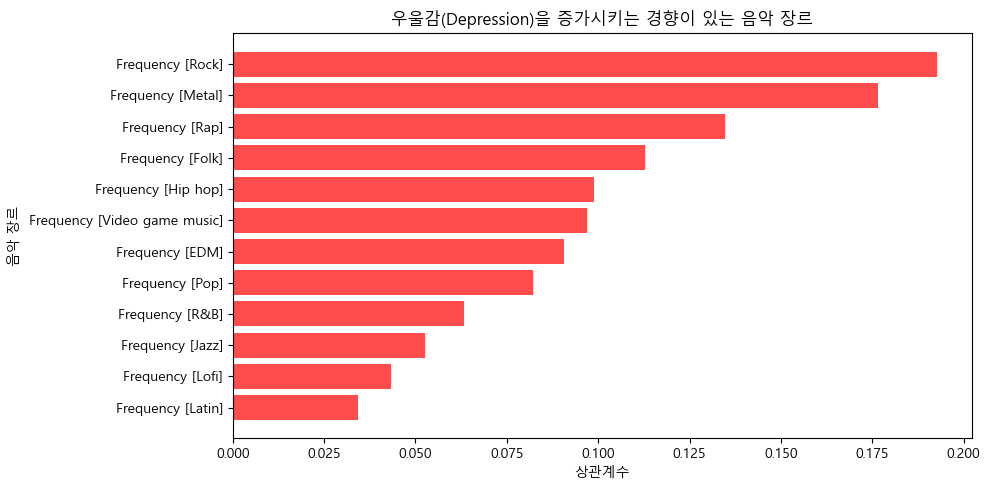

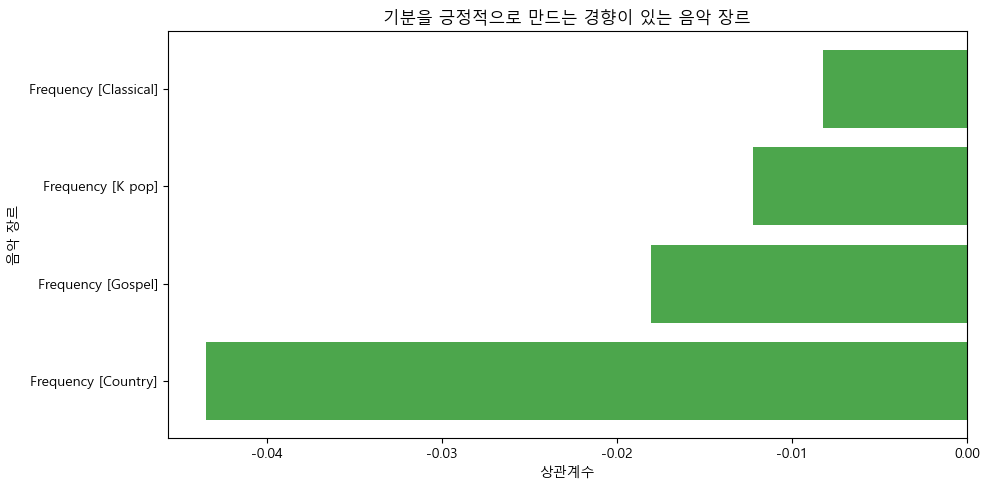

In [50]:
# 각 음악 장르와 우울증(Depression) 간의 상관계수를 기준으로 정렬
depression_correlation = correlation_with_mental_health["Depression"].sort_values()

# 상관계수가 양수인 장르 (우울감 증가 경향)
genres_increasing_depression = depression_correlation[depression_correlation > 0]

# 상관계수가 음수인 장르 (기분을 긍정적으로 만드는 경향)
genres_decreasing_depression = depression_correlation[depression_correlation < 0]

# 결과를 시각화
plt.figure(figsize=(10, 5))
plt.barh(genres_increasing_depression.index, genres_increasing_depression, color='red', alpha=0.7)
plt.title("우울감(Depression)을 증가시키는 경향이 있는 음악 장르")
plt.xlabel("상관계수")
plt.ylabel("음악 장르")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
plt.barh(genres_decreasing_depression.index, genres_decreasing_depression, color='green', alpha=0.7)
plt.title("기분을 긍정적으로 만드는 경향이 있는 음악 장르")
plt.xlabel("상관계수")
plt.ylabel("음악 장르")
plt.tight_layout()
plt.show()


In [51]:


# Insomnia와 음악 장르 간의 상관관계 추출
insomnia_correlation = correlation_matrix["Insomnia"]

# 음악 장르 컬럼 필터링
genre_columns = [col for col in data.columns if "Frequency" in col]
insomnia_correlation_filtered = insomnia_correlation.loc[genre_columns]

# 데이터프레임 생성
insomnia_correlation_df = insomnia_correlation_filtered.to_frame()

# 결과 출력
import pandas as pd
from IPython.display import display

# 데이터프레임 표시
display(insomnia_correlation_df)



,Insomnia
Frequency [Classical],0.076474
Frequency [Country],-0.051349
Frequency [EDM],0.081871
Frequency [Folk],0.043793
Frequency [Gospel],0.003451
Frequency [Hip hop],0.018582
Frequency [Jazz],0.034135
Frequency [K pop],0.008124
Frequency [Latin],0.052427
Frequency [Lofi],0.064956


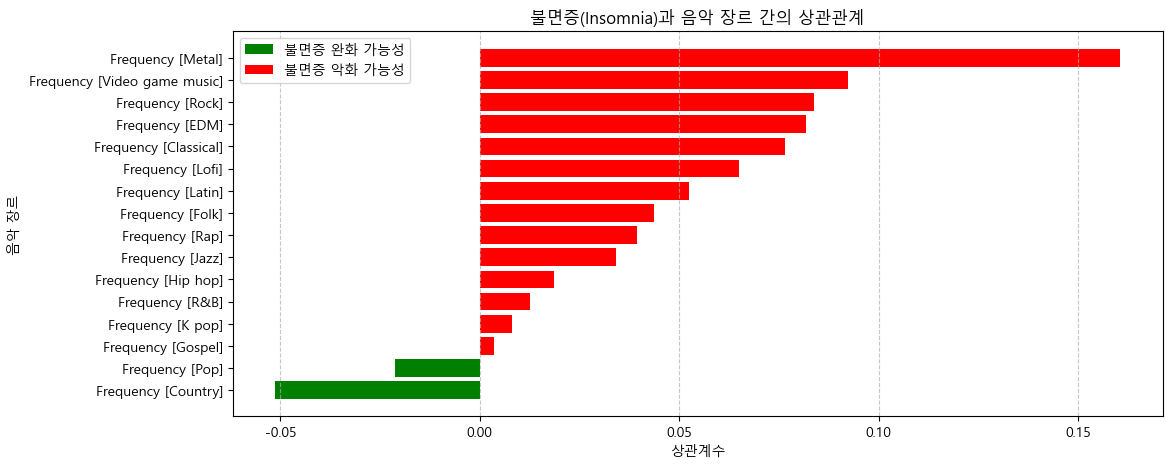

In [52]:
# 불면증(Insomnia)에 긍정적/부정적 요인으로 시각화

# 상관계수 기준으로 정렬
insomnia_correlation_sorted = insomnia_correlation_filtered.sort_values()

# 부정적 요인(음수 상관)과 긍정적 요인(양수 상관) 나누기
negative_factors = insomnia_correlation_sorted[insomnia_correlation_sorted < 0]
positive_factors = insomnia_correlation_sorted[insomnia_correlation_sorted >= 0]

# 그래프 생성
plt.figure(figsize=(12, 5))

# 부정적 요인(녹색)
plt.barh(negative_factors.index, negative_factors.values, color="green", label="불면증 완화 가능성")

# 긍정적 요인(빨간색)
plt.barh(positive_factors.index, positive_factors.values, color="red", label="불면증 악화 가능성")

# 그래프 제목 및 레이블 설정
plt.xlabel("상관계수")
plt.ylabel("음악 장르")
plt.title("불면증(Insomnia)과 음악 장르 간의 상관관계")
plt.legend()
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


In [53]:
# Anxiety와 음악 장르 간의 상관관계 추출
anxiety_correlation = correlation_matrix["Anxiety"]

# 음악 장르 컬럼 필터링
anxiety_correlation_filtered = anxiety_correlation.loc[genre_columns]

# 데이터프레임 생성
anxiety_correlation_df = anxiety_correlation_filtered.to_frame()

# 데이터프레임 출력
import pandas as pd
from IPython.display import display

display(anxiety_correlation_df)



,Anxiety
Frequency [Classical],-0.047259
Frequency [Country],-0.009375
Frequency [EDM],0.042847
Frequency [Folk],0.092154
Frequency [Gospel],-0.038104
Frequency [Hip hop],0.023114
Frequency [Jazz],0.002204
Frequency [K pop],0.032948
Frequency [Latin],-0.008970
Frequency [Lofi],0.078485


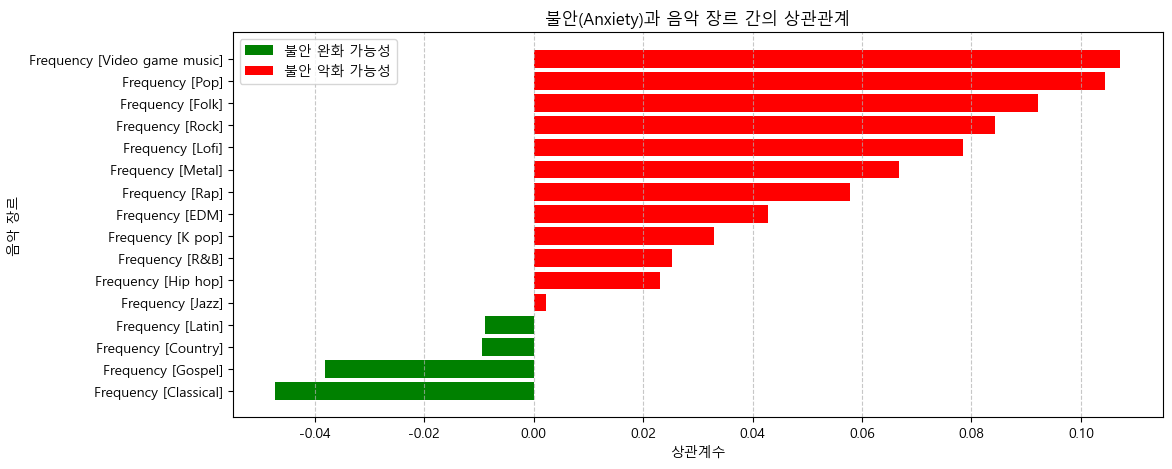

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# 상관계수를 기준으로 정렬
anxiety_correlation_sorted = anxiety_correlation_filtered.sort_values()

# 부정적(음수) 및 긍정적(양수) 요인으로 구분
negative_factors = anxiety_correlation_sorted[anxiety_correlation_sorted < 0]
positive_factors = anxiety_correlation_sorted[anxiety_correlation_sorted >= 0]

# 그래프 생성
plt.figure(figsize=(12, 5))

# 부정적 요인(녹색)
plt.barh(negative_factors.index, negative_factors.values, color="green", label="불안 완화 가능성")

# 긍정적 요인(빨간색)
plt.barh(positive_factors.index, positive_factors.values, color="red", label="불안 악화 가능성")

# 그래프 제목 및 레이블 설정
plt.xlabel("상관계수")
plt.ylabel("음악 장르")
plt.title("불안(Anxiety)과 음악 장르 간의 상관관계")
plt.legend()
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


연령대별 음악 영향 정도

C:\Users\user\AppData\Local\Temp\ipykernel_15920\208711128.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['Music effects','age_group']).size().unstack(fill_value=0)


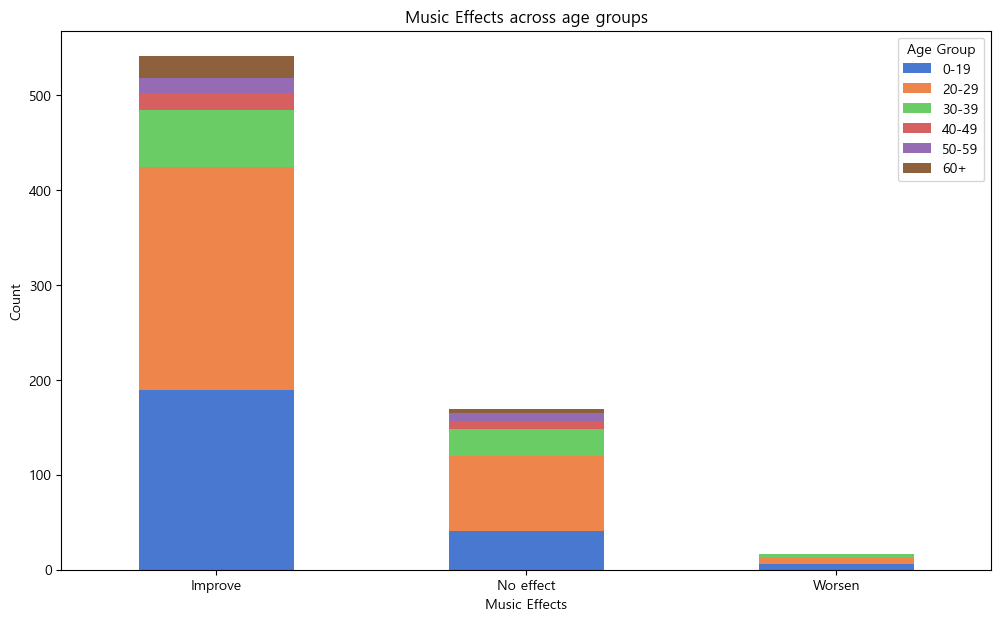

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSV 파일에서 데이터 읽기
df = pd.read_csv('data/정신건강과_음악의상관관계.csv')  # 또는 pd.read_excel('your_file.xlsx') 사용

# 나이 구간 정의
bins = [0, 19, 29, 39, 49, 59, 100]
labels = ['0-19', '20-29', '30-39', '40-49', '50-59', '60+']
df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# music effects에 대한 빈도 계산
grouped = df.groupby(['Music effects','age_group']).size().unstack(fill_value=0)

# 시각화
colors = sns.color_palette("muted")
grouped.plot(kind='bar', stacked=True, color=colors, figsize=(12, 7))
plt.title('Music Effects across age groups')
plt.xlabel('Music Effects')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Age Group')
plt.show()

BPM 분석

C:\Users\user\AppData\Local\Temp\ipykernel_15920\1776771452.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  music_effects_count = data.groupby(["BPM Category", "Music effects"]).size().unstack().fillna(0)


<Figure size 1200x700 with 0 Axes>

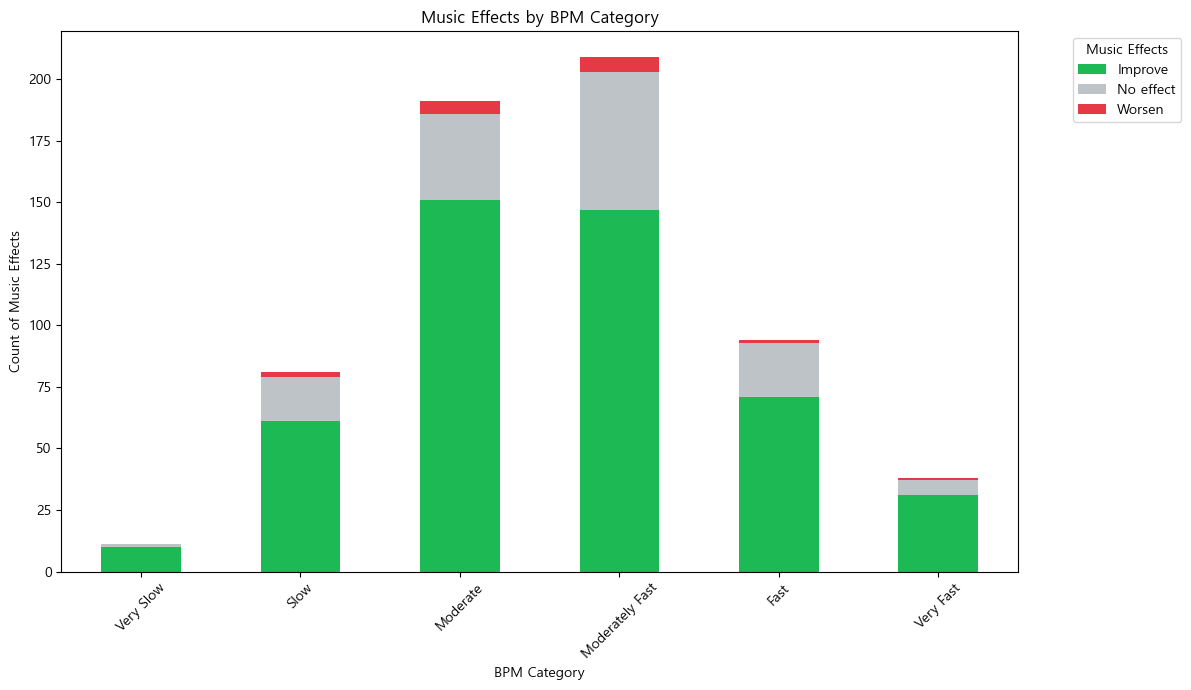

In [56]:
# BPM을 카테고리화하는 함수 정의
def categorize_bpm(bpm):
    if pd.isna(bpm):  # 결측값 처리
        return None
    elif bpm < 60:
        return "Very Slow"
    elif bpm < 90:
        return "Slow"
    elif bpm < 120:
        return "Moderate"
    elif bpm < 150:
        return "Moderately Fast"
    elif bpm < 180:
        return "Fast"
    else:
        return "Very Fast"

# BPM 컬럼을 기반으로 BPM Category 생성
data["BPM Category"] = data["BPM"].apply(categorize_bpm)

# BPM 카테고리 순서 지정
bpm_order = ["Very Slow", "Slow", "Moderate", "Moderately Fast", "Fast", "Very Fast"]

# Categorical 데이터로 변환 (순서 지정)
data["BPM Category"] = pd.Categorical(data["BPM Category"], categories=bpm_order, ordered=True)

# 그룹화 후 다시 정렬
music_effects_count = data.groupby(["BPM Category", "Music effects"]).size().unstack().fillna(0)
music_effects_count = music_effects_count.reindex(index=bpm_order)  # 정렬 적용

# 시각화
plt.figure(figsize=(12, 7))
effects_colors = ["#1DB954", "#BDC3C7", "#E63946"]  # Spotify Green, Neutral Gray, Red
music_effects_count.plot(kind="bar", stacked=True, color=effects_colors, figsize=(12, 7))

plt.title("Music Effects by BPM Category")
plt.xlabel("BPM Category")
plt.ylabel("Count of Music Effects")
plt.xticks(rotation=45)
plt.legend(title="Music Effects", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


전처리_가사감정분포

In [57]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [58]:
import nltk
nltk.download("punkt")  # punkt 데이터 다운로드

import nltk
nltk.download("vader_lexicon")



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

       title sentiment
0   Sherlock        긍정
1     Mr.Mr.        부정
2        추격자        중립
3       STEP        부정
4  Like This        긍정


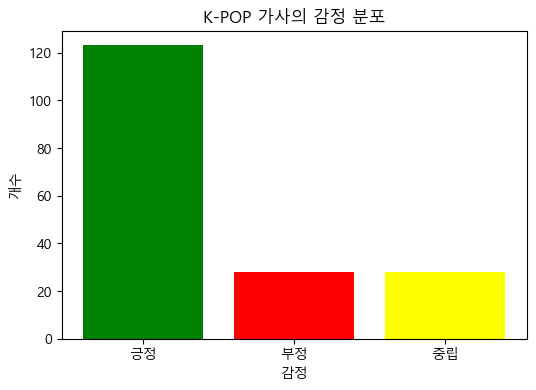

가장 많이 등장하는 단어 50개:
내: 413
난: 371
더: 325
love: 324
im: 321
like: 268
baby: 257
날: 238
널: 182
dont: 179
just: 167
wanna: 161
내가: 158
hey: 157
know: 153
나: 148
너무: 126
feel: 116
좀: 112
나를: 109
또: 105
right: 105
want: 104
거야: 99
우린: 99
say: 97
자꾸: 97
너의: 96
너를: 96
good: 96
지금: 94
우리: 94
너: 92
really: 92
come: 90
got: 90
make: 90
너와: 87
네가: 84
없어: 80
whats: 79
걸: 78
dance: 77
나의: 76
high: 75
마: 74
boy: 73
look: 73
need: 72
ill: 72


In [59]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
import re
from collections import Counter
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# 감정 분석기 초기화
sia = SentimentIntensityAnalyzer()

# CSV 데이터 불러오기 (파일명을 원하는 경로로 변경)
df = pd.read_csv("./data/장르별가사/kpop 가사.csv")  # 'songs.csv'는 노래제목(title)과 가사(lyrics) 컬럼을 포함한 CSV 파일

# 불용어 리스트 정의
stopwords = {"이", "해", "돼", "건", "아","할", "두", "넌", "다",
             "수", "그", "저", "의", "가", "을", "를", "은", "는", "에",
             "한", "하다", "아아", "그렇다", "그게", "그대", "그냥", "사람", "내게",
                   "세상", "것", "라", "와", "네", "게", "될", "때", "하", "루루", 
             "yeah", "ah", "오", "우우", "오오", "우우", "순", "봐", "la", "oh",
            "uh","ooh"} | ENGLISH_STOP_WORDS

# 토큰화 및 불용어 제거 함수
def preprocess_lyrics(lyrics):
    if pd.isna(lyrics):  # 가사가 없는 경우 예외 처리
        return ""
    lyrics = lyrics.lower()  # 소문자 변환
    lyrics = re.sub(r"[^a-zA-Z가-힣0-9\s]", "", lyrics)  # 특수문자 제거
    words = lyrics.split()  # 공백을 기준으로 토큰화
    filtered_words = [word for word in words if word not in stopwords]  # 불용어 제거
    return " ".join(filtered_words)

# 가사 전처리 적용
df['processed_lyrics'] = df['lyrics'].apply(preprocess_lyrics)

# 감정 분석 수행
def analyze_sentiment(lyrics):
    if pd.isna(lyrics) or lyrics.strip() == "":  # 가사가 없는 경우 예외 처리
        return "중립"
    scores = sia.polarity_scores(lyrics)
    
    # 감정 점수에 따라 분류
    if scores['compound'] >= 0.05:
        return "긍정"
    elif scores['compound'] <= -0.05:
        return "부정"
    else:
        return "중립"

# 새로운 컬럼 'sentiment' 추가
df['sentiment'] = df['processed_lyrics'].apply(analyze_sentiment)

# 결과 저장
#df.to_csv("songs_with_sentiment.csv", index=False)

# 감정 분석 결과 출력
print(df[['title', 'sentiment']].head())

# 감정 분포 시각화
sentiment_counts = df['sentiment'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=["green", "red", "yellow"])
plt.xlabel("감정")
plt.ylabel("개수")
plt.title("K-POP 가사의 감정 분포")
plt.savefig("kpop.jpg")
plt.show()

# 가사에서 가장 많이 등장하는 토큰(단어) 50개 추출
token_list = " ".join(df['processed_lyrics']).split()
token_counts = Counter(token_list)
most_common_tokens = token_counts.most_common(50)

# 토큰 빈도 출력
print("가장 많이 등장하는 단어 50개:")
for word, count in most_common_tokens:
    print(f"{word}: {count}")


                        title sentiment
0     johnny stimson - flower        긍정
1  johnny stimson - Honeymoon        긍정
2   johnny stimson - Vacation        긍정
3      johnny stimson - ghost        부정
4     johnny stimson - rocket        긍정


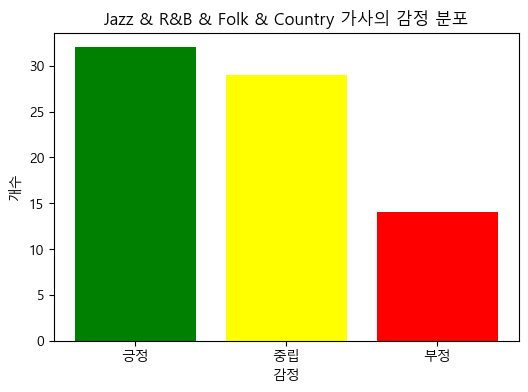

가장 많이 등장하는 단어 50개:
dont: 157
im: 134
love: 131
know: 120
just: 112
like: 96
youre: 91
let: 84
wanna: 72
baby: 64
time: 60
want: 60
cause: 57
thats: 54
got: 52
feel: 50
난: 50
tell: 48
내가: 47
day: 45
내: 42
say: 40
girl: 38
나의: 38
away: 34
fall: 34
ill: 33
gotta: 33
break: 32
또: 31
way: 29
said: 29
wont: 28
rocket: 27
postin: 27
think: 26
mind: 25
talk: 25
night: 24
maybe: 24
need: 24
make: 24
little: 23
right: 23
ive: 23
lane: 22
come: 21
말고: 21
carpool: 21
더: 20


In [60]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
import re
from collections import Counter
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# 감정 분석기 초기화
sia = SentimentIntensityAnalyzer()

# CSV 데이터 불러오기 (파일명을 원하는 경로로 변경)
df = pd.read_csv("./data/장르별가사/jazz_r&b_folk_country_가사.csv")  # 'songs.csv'는 노래제목(title)과 가사(lyrics) 컬럼을 포함한 CSV 파일

# 불용어 리스트 정의
stopwords = {"이", "해", "돼", "건", "아","할", "두", "넌", "다",
             "수", "그", "저", "의", "가", "을", "를", "은", "는", "에",
             "한", "하다", "아아", "그렇다", "그게", "그대", "그냥", "사람", "내게",
                   "세상", "것", "라", "와", "네", "게", "될", "때", "하", "루루", 
             "yeah", "ah", "오", "우우", "오오", "우우", "순", "봐", "la", "oh",
            "uh","ooh"} | ENGLISH_STOP_WORDS

# 토큰화 및 불용어 제거 함수
def preprocess_lyrics(lyrics):
    if pd.isna(lyrics):  # 가사가 없는 경우 예외 처리
        return ""
    lyrics = lyrics.lower()  # 소문자 변환
    lyrics = re.sub(r"[^a-zA-Z가-힣0-9\s]", "", lyrics)  # 특수문자 제거
    words = lyrics.split()  # 공백을 기준으로 토큰화
    filtered_words = [word for word in words if word not in stopwords]  # 불용어 제거
    return " ".join(filtered_words)

# 가사 전처리 적용
df['processed_lyrics'] = df['lyrics'].apply(preprocess_lyrics)

# 감정 분석 수행
def analyze_sentiment(lyrics):
    if pd.isna(lyrics) or lyrics.strip() == "":  # 가사가 없는 경우 예외 처리
        return "중립"
    scores = sia.polarity_scores(lyrics)
    
    # 감정 점수에 따라 분류
    if scores['compound'] >= 0.05:
        return "긍정"
    elif scores['compound'] <= -0.05:
        return "부정"
    else:
        return "중립"

# 새로운 컬럼 'sentiment' 추가
df['sentiment'] = df['processed_lyrics'].apply(analyze_sentiment)

# 결과 저장
#df.to_csv("songs_with_sentiment.csv", index=False)

# 감정 분석 결과 출력
print(df[['title', 'sentiment']].head())

# 감정 분포 시각화
sentiment_counts = df['sentiment'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=["green", "yellow", "red"])
plt.xlabel("감정")
plt.ylabel("개수")
plt.title("Jazz & R&B & Folk & Country 가사의 감정 분포")
plt.savefig('Jazz 감정 분포.png')
plt.show()

# 가사에서 가장 많이 등장하는 토큰(단어) 50개 추출
token_list = " ".join(df['processed_lyrics']).split()
token_counts = Counter(token_list)
most_common_tokens = token_counts.most_common(50)

# 토큰 빈도 출력
print("가장 많이 등장하는 단어 50개:")
for word, count in most_common_tokens:
    print(f"{word}: {count}")


                            title sentiment
0  Smoke (Prod. Dynamicduo, Padi)        긍정
1     \nBody\nMegan Thee Stallion        중립
2       \nKIKA (feat. Tory Lanez)        부정
3    \nBestie (feat. Kodak Black)        부정
4     \nMustard, RJMrLA - I Do...        중립


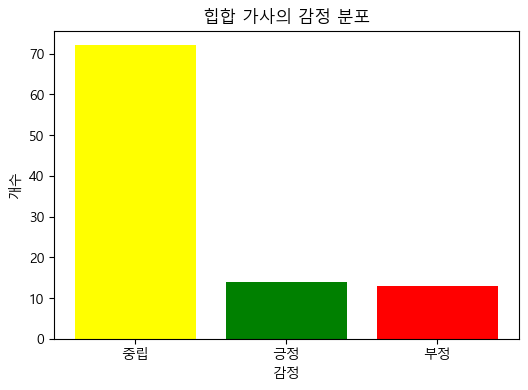

가장 많이 등장하는 단어 50개:
내: 571
내가: 436
나를: 422
나는: 329
그래: 323
파: 293
이제: 272
있어: 244
있어요: 235
그리고: 231
보고: 225
거야: 213
그녀는: 192
저는: 182
어: 180
우리는: 166
모든: 142
가자: 141
너무: 130
야: 124
그들은: 123
있는: 109
더: 106
걸어: 104
위해: 101
걸: 100
네가: 100
제가: 99
거예요: 98
소녀야: 98
난: 97
에이: 94
그녀가: 92
제: 86
것을: 86
당신은: 84
그들을: 84
아니: 83
낮게: 82
함께: 81
하지만: 81
자기야: 81
마세요: 81
있습니다: 79
있을: 79
당신의: 79
정말: 78
이렇게: 78
나와: 76
위에: 74


In [61]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
import re
from collections import Counter
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# 감정 분석기 초기화
sia = SentimentIntensityAnalyzer()

# CSV 데이터 불러오기 (파일명을 원하는 경로로 변경)
df = pd.read_csv("./data/장르별가사/hiphop가사.csv")  # 'songs.csv'는 노래제목(title)과 가사(lyrics) 컬럼을 포함한 CSV 파일

# 불용어 리스트 정의
stopwords = {"이", "해", "돼", "건", "아","할", "두", "넌", "다",
             "수", "그", "저", "의", "가", "을", "를", "은", "는", "에",
             "한", "하다", "아아", "그렇다", "그게", "그대", "그냥", "사람", "내게",
                   "세상", "것", "라", "와", "네", "게", "될", "때", "하", "루루", 
             "yeah", "ah", "오", "우우", "오오", "우우", "순", "봐", "la"} | ENGLISH_STOP_WORDS

# 토큰화 및 불용어 제거 함수
def preprocess_lyrics(lyrics):
    if pd.isna(lyrics):  # 가사가 없는 경우 예외 처리
        return ""
    lyrics = lyrics.lower()  # 소문자 변환
    lyrics = re.sub(r"[^a-zA-Z가-힣0-9\s]", "", lyrics)  # 특수문자 제거
    words = lyrics.split()  # 공백을 기준으로 토큰화
    filtered_words = [word for word in words if word not in stopwords]  # 불용어 제거
    return " ".join(filtered_words)

# 가사 전처리 적용
df['processed_lyrics'] = df['lyrics'].apply(preprocess_lyrics)

# 감정 분석 수행
def analyze_sentiment(lyrics):
    if pd.isna(lyrics) or lyrics.strip() == "":  # 가사가 없는 경우 예외 처리
        return "중립"
    scores = sia.polarity_scores(lyrics)
    
    # 감정 점수에 따라 분류
    if scores['compound'] >= 0.05:
        return "긍정"
    elif scores['compound'] <= -0.05:
        return "부정"
    else:
        return "중립"

# 새로운 컬럼 'sentiment' 추가
df['sentiment'] = df['processed_lyrics'].apply(analyze_sentiment)

# 결과 저장
#df.to_csv("songs_with_sentiment.csv", index=False)

# 감정 분석 결과 출력
print(df[['title', 'sentiment']].head())

# 감정 분포 시각화
sentiment_counts = df['sentiment'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=["yellow", "green", "red"])
plt.xlabel("감정")
plt.ylabel("개수")
plt.title("힙합 가사의 감정 분포")
plt.savefig("힙합 감정 분포.jpg")
plt.show()

# 가사에서 가장 많이 등장하는 토큰(단어) 50개 추출
token_list = " ".join(df['processed_lyrics']).split()
token_counts = Counter(token_list)
most_common_tokens = token_counts.most_common(50)

# 토큰 빈도 출력
print("가장 많이 등장하는 단어 50개:")
for word, count in most_common_tokens:
    print(f"{word}: {count}")


       title sentiment
0      비비 편지        중립
1   어른 - 손디아        중립
2  아이유 - 개여울        중립
3  정인 - 오르막길        중립
4    최유리 - 숲        중립


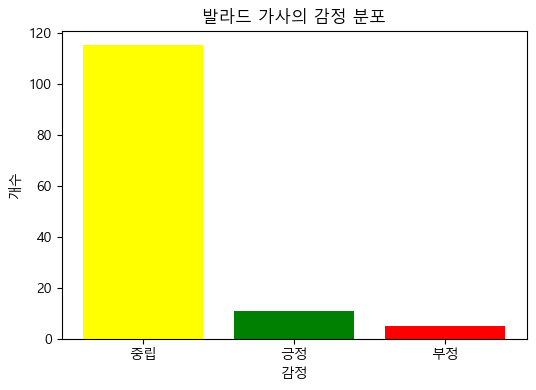

가장 많이 등장하는 단어 50개:
난: 181
내: 178
내가: 141
날: 134
나를: 117
나의: 109
또: 109
나는: 97
더: 96
널: 84
우리: 80
너의: 71
다시: 71
없는: 70
나: 64
왜: 59
너를: 50
걸: 49
거야: 49
마음: 47
밤: 47
있는: 43
모든: 42
말: 40
우린: 40
이렇게: 39
그래: 36
그런: 33
네가: 33
너무: 32
같은: 31
어떤: 30
그렇게: 30
사랑을: 30
같아: 29
이제: 28
있어: 27
없이: 27
않게: 27
어떻게: 27
작은: 26
아직: 26
마음에: 26
말을: 26
눈을: 25
사랑해: 25
마음이: 25
사랑이: 25
좋은: 24
늘: 24


In [62]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
import re
from collections import Counter
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# 감정 분석기 초기화
sia = SentimentIntensityAnalyzer()

# CSV 데이터 불러오기 (파일명을 원하는 경로로 변경)
df = pd.read_csv("./data/장르별가사/발라드_가사.csv")  # 'songs.csv'는 노래제목(title)과 가사(lyrics) 컬럼을 포함한 CSV 파일

# 불용어 리스트 정의
stopwords = {"이", "해", "돼", "건", "아","할", "두", "넌", "다",
             "수", "그", "저", "의", "가", "을", "를", "은", "는", "에",
             "한", "하다", "아아", "그렇다", "그게", "그대", "그냥", "사람", "내게",
                   "세상", "것", "라", "와", "네", "게", "될", "때", "하", "루루", 
             "yeah", "ah", "오", "우우", "오오", "우우", "순", "봐", "la"} | ENGLISH_STOP_WORDS

# 토큰화 및 불용어 제거 함수
def preprocess_lyrics(lyrics):
    if pd.isna(lyrics):  # 가사가 없는 경우 예외 처리
        return ""
    lyrics = lyrics.lower()  # 소문자 변환
    lyrics = re.sub(r"[^a-zA-Z가-힣0-9\s]", "", lyrics)  # 특수문자 제거
    words = lyrics.split()  # 공백을 기준으로 토큰화
    filtered_words = [word for word in words if word not in stopwords]  # 불용어 제거
    return " ".join(filtered_words)

# 가사 전처리 적용
df['processed_lyrics'] = df['lyrics'].apply(preprocess_lyrics)

# 감정 분석 수행
def analyze_sentiment(lyrics):
    if pd.isna(lyrics) or lyrics.strip() == "":  # 가사가 없는 경우 예외 처리
        return "중립"
    scores = sia.polarity_scores(lyrics)
    
    # 감정 점수에 따라 분류
    if scores['compound'] >= 0.05:
        return "긍정"
    elif scores['compound'] <= -0.05:
        return "부정"
    else:
        return "중립"

# 새로운 컬럼 'sentiment' 추가
df['sentiment'] = df['processed_lyrics'].apply(analyze_sentiment)

# 결과 저장
#df.to_csv("songs_with_sentiment.csv", index=False)

# 감정 분석 결과 출력
print(df[['title', 'sentiment']].head())

# 감정 분포 시각화
sentiment_counts = df['sentiment'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=["yellow", "green", "red"])
plt.xlabel("감정")
plt.ylabel("개수")
plt.title("발라드 가사의 감정 분포")
plt.savefig("발라드 감정 분포.jpg")
plt.show()

# 가사에서 가장 많이 등장하는 토큰(단어) 50개 추출
token_list = " ".join(df['processed_lyrics']).split()
token_counts = Counter(token_list)
most_common_tokens = token_counts.most_common(50)

# 토큰 빈도 출력
print("가장 많이 등장하는 단어 50개:")
for word, count in most_common_tokens:
    print(f"{word}: {count}")


                                      title sentiment
0                          RISE - 리그 오브 레전드        중립
1  The Last Of The Real Ones - Fall Out Boy        중립
2                  Centuries - Fall Out Boy        중립
3                The Phoenix - Fall Out Boy        중립
4                Warriors - Imagine Dragons        긍정

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


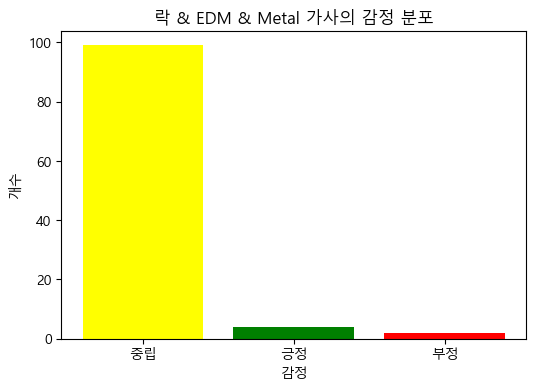

가장 많이 등장하는 단어 50개:
우리는: 272
나는: 268
내가: 235
내: 232
아니: 225
더: 205
있어요: 204
나를: 197
모든: 196
거야: 186
그리고: 151
있습니다: 134
지금: 121
저는: 118
것을: 111
있어: 110
당신이: 102
당신은: 102
않을: 96
당신의: 93
하지만: 91
이제: 84
너무: 83
있는: 80
우리가: 80
마세요: 80
다시: 76
거예요: 74
강하게: 74
없어: 73
그녀는: 71
것입니다: 67
제가: 67
그래: 65
계속: 65
우리: 63
위해: 61
정말: 61
할: 59
너는: 54
그들은: 53
않아요: 53
것이: 53
여기: 51
있다: 51
나의: 50
것은: 48
때까지: 48
대한: 48
당신을: 46


In [63]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
import re
from collections import Counter
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# 🔹 NLTK VADER 감정 분석 사전 다운로드
nltk.download("vader_lexicon")

plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# 감정 분석기 초기화
sia = SentimentIntensityAnalyzer()

# CSV 데이터 불러오기 (파일명을 원하는 경로로 변경)
df = pd.read_csv("./data/장르별가사/락_EDM_METAL가사.csv")  # 'songs.csv'는 노래제목(title)과 가사(lyrics) 컬럼을 포함한 CSV 파일

# 불용어 리스트 정의
stopwords = {"이", "수", "그", "저", "의", "가", "을", "를", "은", "는", "에", "한", "하다", "아아", "그렇다", "그게", "그대", "그냥", "사람", "내게",
             "세상", "것", "라", "와", "네", "게", "될", "때", "하", "루루", "yeah", "ah", "오", "우우", "오오", "우우"} | ENGLISH_STOP_WORDS

# 텍스트 전처리 함수
def preprocess_lyrics(lyrics):
    if pd.isna(lyrics):  # NaN 값 방지
        return ""
    lyrics = lyrics.lower()  # 소문자 변환
    lyrics = re.sub(r"[^a-zA-Z가-힣0-9\s]", "", lyrics)  # 특수문자 제거
    words = lyrics.split()  # 공백을 기준으로 토큰화
    filtered_words = [word for word in words if word not in stopwords]  # 불용어 제거
    return " ".join(filtered_words)

# 가사 전처리 적용
df['processed_lyrics'] = df['lyrics'].apply(preprocess_lyrics)

# 감정 분석 수행
def analyze_sentiment(lyrics):
    if pd.isna(lyrics) or lyrics.strip() == "":  # 가사가 없는 경우 예외 처리
        return "중립"
    scores = sia.polarity_scores(lyrics)

    # 감정 점수에 따라 분류
    if scores['compound'] >= 0.05:
        return "긍정"
    elif scores['compound'] <= -0.05:
        return "부정"
    else:
        return "중립"

# 감정 분석 컬럼 추가
df['sentiment'] = df['processed_lyrics'].apply(analyze_sentiment)

# 감정 분석 결과 출력
print(df[['title', 'sentiment']].head())

# 감정 분포 시각화
sentiment_counts = df['sentiment'].value_counts()
plt.figure(figsize=(6, 4))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=["yellow", "green", "red"])
plt.xlabel("감정")
plt.ylabel("개수")
plt.title("락 & EDM & Metal 가사의 감정 분포")
plt.savefig("락 감정 분포.jpg")
plt.show()

# 가사에서 가장 많이 등장하는 토큰(단어) 50개 추출
token_list = " ".join(df['processed_lyrics']).split()
token_counts = Counter(token_list)
most_common_tokens = token_counts.most_common(50)

# 토큰 빈도 출력
print("가장 많이 등장하는 단어 50개:")
for word, count in most_common_tokens:
    print(f"{word}: {count}")


In [64]:
#!pip install chardet

파일 합치기 코드

In [65]:
# import os
# import pandas as pd

# # CSV 파일이 저장된 폴더 경로
# folder_path = "./data/"  # 원하는 폴더 경로로 변경하세요.

# # 폴더 내 모든 CSV 파일 목록 가져오기
# csv_files = [f for f in os.listdir(folder_path) if f.endswith(".csv")]

# # 모든 CSV 파일을 읽어서 리스트에 저장
# df_list = [pd.read_csv(os.path.join(folder_path, file)) for file in csv_files]

# # 데이터프레임 합치기
# merged_df = pd.concat(df_list, ignore_index=True)

# # 합친 데이터를 새로운 CSV 파일로 저장
# merged_df.to_csv("EDM.csv", index=False)

# print(f"총 {len(csv_files)}개의 파일이 합쳐졌습니다.")

In [66]:
#!pip install nltk

In [67]:
# import os
# import pandas as pd

# # CSV 파일이 저장된 폴더 경로
# folder_path = "./data"  # 원하는 폴더 경로로 변경하세요.

# # 삭제할 컬럼 리스트
# columns_to_drop = ['cid','time','author','channel','votes','replies','photo','heart','time_parsed','paid']  # 삭제할 컬럼명을 입력하세요.

# # 폴더 내 모든 CSV 파일 목록 가져오기
# csv_files = [f for f in os.listdir(folder_path) if f.endswith(".csv")]

# # 모든 CSV 파일을 읽어서 리스트에 저장 (컬럼 삭제 포함)
# df_list = [pd.read_csv(os.path.join(folder_path, file)).drop(columns=columns_to_drop, errors='ignore') for file in csv_files]

# # 데이터프레임 합치기
# merged_df = pd.concat(df_list, ignore_index=True)

# # 합친 데이터를 새로운 CSV 파일로 저장
# merged_df.to_csv("EDM.csv", index=False)

# print(f"총 {len(csv_files)}개의 파일이 합쳐졌으며, {columns_to_drop} 컬럼이 삭제되었습니다.")

장르별 댓글 워드클라우드

1.클래식

In [68]:
df = pd.read_csv('./data/유튜브댓글크롤링/classic.csv')
df = df.dropna()
df

,text
0,시대를 뛰어넘어 만난 두 천재가 얼마나 많은 사람들의 지치고 황폐해진 마음을 음악으...
1,왜 엄숙한 분위기가 되는지 알것같아요❤
2,나 울고있네....줄줄 눈물을 흘리고 있었네 나 위로가 필요했구나
3,앨범 주세요❤❤❤❤
4,😢😢😢😢슬퍼
...,...
12477,방구석에서 듣는 스트라디바리우스
12478,저도요!!!
12479,부모님 추모공연 인걸로 알고있습니다.
12480,아마도요


In [69]:
from mecab import MeCab

df = pd.read_csv('./data/유튜브댓글크롤링/classic.csv').dropna()

mecab = MeCab()

# 원하는 품사 태그 목록 설정
use_tags = ['NNP', 'NNG', 'NP', 'IC', 'MAG']
# 불용어 목록
stopwords = ["이", "그", "저", "의", "가", "을", "를", "은", "는", "에", "한", "하다",'에서',
                    '그런','모두','입니다','으로','있습니다','합니다','듣는','된','랑','처음',
                    '음악','너무','진짜','정말','나이','합니다','처럼','연주','그냥','조성진',
                   '가장','뭔가','녹즙','광고','아니라','들으면','많은','때문','까지','아이',
                   '성진','에는','하는데','정경화','많이','같습니다','자주','이곡','그때','듣고','어떻게',
                   '연주자','영상','이런','이라는','어떤','들어','이지만','악기','같은','오늘',
                   '댓글','이렇게','다시','ㅋㅋㅋ','ㅋㅋ','피아노','시간','녹턴','비창','바이올린','여기',
            '클래식','함께','순간','플리','선생','ㅎㅎ','우리','피아니스트','계속','시청','너무나','이거','어디','사람','없이','바흐',
            '항상','표정','가슴','정도','요즘','베토벤','기분','유튜브','아버지','기침','당신','엄마','드뷔시','쇼팽',
            '소리','시절','세상','말씀','표현','지금','나라','이제','채널','자신','인간','배경','구독','조금','자체','모습','하늘','하루',
            'ㅎㅎㅎ','리스트','얼마나','이상','샤콘','부모','천재','윤찬','바로','언제','한국','연주가','아주','영화','명곡',
            '조심','누구','매일','세계','선곡','기억','이유','우연히','악보','회장','거장','이름','소나타','공연','아빠','건반',
            '모차르트','같이','달빛','가득','자기','마지막','잠시','제목','아침','연습','중간']

# 토큰화 함수 정의
def cleaning(review):
    # 품사 태그와 함께 토큰화
    kwords = mecab.pos(review)
    
    # 원하는 품사만 필터링
    kwords = [w[0]for w in kwords if w[1] in use_tags]
    # 불용어 제거 추가
    kwords = [word for word in kwords if word not in stopwords and len(word) > 1]
    clean = ' '.join(kwords)

    return clean

# 클렌징 함수 적용
df['text_tag'] = df['text'].apply(cleaning)
df.to_csv('./data/classic2.csv',index = False)
df

,text,text_tag
0,시대를 뛰어넘어 만난 두 천재가 얼마나 많은 사람들의 지치고 황폐해진 마음을 음악으...,시대 마음 시대 행운 생각
1,왜 엄숙한 분위기가 되는지 알것같아요❤,분위기
2,나 울고있네....줄줄 눈물을 흘리고 있었네 나 위로가 필요했구나,줄줄 눈물 위로 필요
3,앨범 주세요❤❤❤❤,앨범 주세요
4,😢😢😢😢슬퍼,
...,...,...
12477,방구석에서 듣는 스트라디바리우스,방구석 스트라디바리우스
12478,저도요!!!,
12479,부모님 추모공연 인걸로 알고있습니다.,추모 인걸
12480,아마도요,아마도


In [70]:
from wordcloud import WordCloud
import numpy as np


# WordCloud 모델 생성
font_path = "malgun.ttf" 
wc = WordCloud(font_path=font_path,  # 폰트입력
               background_color="white", # 배경색
               collocations=False,     
               width=800,                # 넓이
               height=400,               # 높이
               scale=1,
               max_words=45 )                  


wc.generate(' '.join(df['text_tag'])) # 모델에 텍스트 뭉치 입력

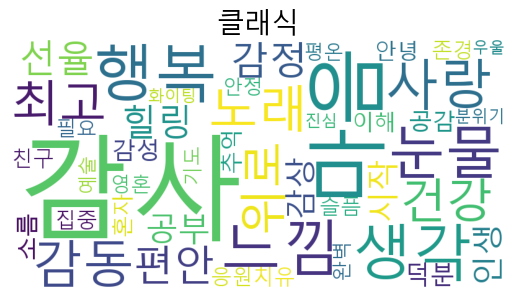

In [71]:
import matplotlib.pyplot as plt


ax = plt.subplot()
ax.imshow(wc) # 이미지를 표에 입력
ax.set_title('클래식', fontsize=20)

for i in 'top bottom right left'.split():
    ax.spines[i].set_visible(False)

ax.tick_params(left=False, right=False, labelleft=False,
               labelbottom=False, bottom=False)

plt.show()

2.클래식

In [72]:
df = pd.read_csv('./data/유튜브댓글크롤링/pop.csv')
df = df.dropna()
df

,text
0,일단 썸네일이 키오프인거 부터 마음에 들어요❤❤❤❤❤😊😊
1,그래...원했던게 이거였어..!
2,와 노래끊기지도않고 개쩌네요 구독박습니다
3,와이거진짜최고….💋
4,타임테이블 없나여?
...,...
7453,완젼 좋넹 ㅎㅎㅎ
7454,"오늘도 좋은 영상 감사합니당! 근데 예전에 본거 같네용,"
7455,1분 전!!\n이렇게 빨리 온 건 처음이네요🫣\n오늘도 플리 잘 듣고 가겠습니다🎧
7456,썸네일 같아도 노래곡들 약간 다른듯


In [73]:
from mecab import MeCab

df = pd.read_csv('./data/유튜브댓글크롤링/pop.csv').dropna()

mecab = MeCab()

# 원하는 품사 태그 목록 설정
use_tags = ['NNP', 'NNG', 'NP', 'IC', 'MAG']
# 불용어 목록
stopwords = ["이", "그", "저", "의", "가", "을", "를", "은", "는", "에", "한", "하다",'에서',
                    '그런','모두','입니다','으로','있습니다','합니다','듣는','된','랑','처음','ㅋㅋ','ㅋㅋㅋ',
            '플레이','많이','마이네임','박희순','아저씨','다시','아니','오늘','여자','선곡','우리','음악','최무진','시간',
            '정말','ㅎㅎ','동천','많이','이렇게','너무','리스트','영상','플리','내일','노래','제목','팝송','믹스','남자','이거','보스',
            '부분','담배','믹스','같이','영화','누구','재생','계속','유튜브','구독','이제','통과','다음','항상','가수','하루','뮤직',
            '느낌','당신','드라마','아직','그냥','진짜','따로','이번','마약','혹시','자신','바로','그렇게','포기','배우','어떻게',
            '영어','요즘','박휘순','정도','매일','직접','경찰','어디','아이','가사','댓글','마지막','무진순간','알고리즘','엄마','대학',
            '케이','없이','사진','이용','가능','광고','면접','라인','멜론','진스','이상','언제','전부','자꾸','츄츄','세븐','무진',
            '타임','검색','채널','세븐','명곡','아빠','주인장','동안','아이유','진심','스포티파이','아주','학교','인정','추가',
            '수능','제일','옛날','기말','원래','이것','찰떡','업로드','조금','소리','이름','비트','고정','현재','자주','사람','여러분',
            '스타','저장','천재','완전','지금','오랜만','목록','자기','개인','비바','선생','조직','연기','맨날','되게','중간','이분','편집',
            '세상','머리','준비','이유','정태주','장면','결과','캐릭터','최종','부탁','고등학교','저희','가요','순간','중간고사','성경',
            '특히','말씀','무엇','목소리','태주','지우','기억','해석','무채색','인생','벌써','오프','무조건','여기','예전','그녀','블랙',
            '갑자기','가장','자체','핑크','솔직히','엄청','혼자','조직원','스타일','배경','반복','발매','조폭','콜드플레이']

# 토큰화 함수 정의
def cleaning(review):
    # 품사 태그와 함께 토큰화
    kwords = mecab.pos(review)
    
    # 원하는 품사만 필터링
    kwords = [w[0]for w in kwords if w[1] in use_tags]
    # 불용어 제거 추가
    kwords = [word for word in kwords if word not in stopwords and len(word) > 1]
    clean = ' '.join(kwords)

    return clean

# 클렌징 함수 적용
df['text_tag'] = df['text'].apply(cleaning)
df.to_csv('./data/classic2.csv',index = False)
df

,text,text_tag
0,일단 썸네일이 키오프인거 부터 마음에 들어요❤❤❤❤❤😊😊,일단 마음
1,그래...원했던게 이거였어..!,그래
2,와 노래끊기지도않고 개쩌네요 구독박습니다,
3,와이거진짜최고….💋,최고
4,타임테이블 없나여?,테이블
...,...,...
7453,완젼 좋넹 ㅎㅎㅎ,ㅎㅎㅎ
7454,"오늘도 좋은 영상 감사합니당! 근데 예전에 본거 같네용,",감사
7455,1분 전!!\n이렇게 빨리 온 건 처음이네요🫣\n오늘도 플리 잘 듣고 가겠습니다🎧,빨리
7456,썸네일 같아도 노래곡들 약간 다른듯,노래곡 약간


In [74]:
from wordcloud import WordCloud
import numpy as np


# WordCloud 모델 생성
font_path = "malgun.ttf" 
wc = WordCloud(font_path=font_path,  # 폰트입력
               background_color="white", # 배경색
               collocations=False,     
               width=800,                # 넓이
               height=400,               # 높이
               scale=1,
               max_words=50 )                  


wc.generate(' '.join(df['text_tag'])) # 모델에 텍스트 뭉치 입력

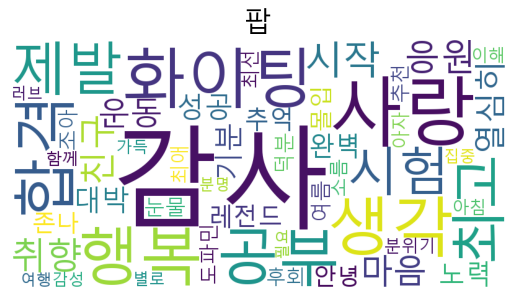

In [75]:
import matplotlib.pyplot as plt


ax = plt.subplot()
ax.imshow(wc) # 이미지를 표에 입력
ax.set_title('팝', fontsize=20)

for i in 'top bottom right left'.split():
    ax.spines[i].set_visible(False)

ax.tick_params(left=False, right=False, labelleft=False,
               labelbottom=False, bottom=False)

plt.show()

재즈

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


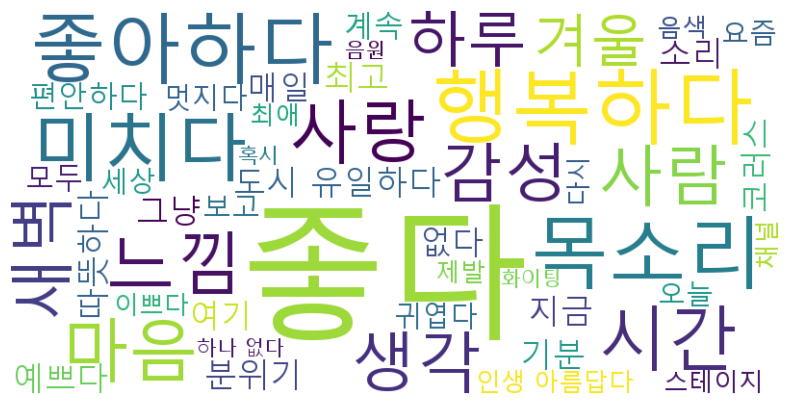

In [76]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from mecab import MeCab
import re

# 🔹 한국어 형태소 분석기 (KoNLPy 사용 가능, 여기선 단순 띄어쓰기 토큰화)
from konlpy.tag import Okt  

# 🔹 한글 폰트 경로 (워드클라우드에서 한글 표시용)
font_path = "malgun.ttf"  # Windows: "malgun.ttf", Mac: "AppleGothic", Linux: 적절한 폰트 지정

# 🔹 nltk 불용어 데이터 다운로드 (최초 1회 실행 필요)
nltk.download("stopwords")
nltk.download("punkt")

# 🔹 한국어 불용어 리스트 (직접 추가 가능)
korean_stopwords = ["이", "그", "저", "의", "가", "을", "를", "은", "는", "에", "한", "하다", "음악", "노래", "진짜", "도", "백예린",
                    "thanks", "thank", "플리", "너무", "song", "jazz", "music", "im", "potato", "으로", "이런","정말", "이렇다", "이다",
                   "같다", "있다", "항상", "플레이리스트", "영상", "당신", "시청", "세용", "아마", "아니다", "괜시리", "자주", "플레이",
                    "댓글", "리스트", "공부", "가사", "재즈", "어떻다", "세션", "그렇다", "많다"]

# 🔹 영어 불용어 리스트
stop_words = set(stopwords.words("english"))

# 🔹 텍스트 토큰화 + 전처리 함수
def preprocess_text(text):
    if isinstance(text, float):  # NaN 값 방지
        return []
    
    text = text.lower()  # 소문자로 변환
    text = re.sub(r"http\S+|www\S+", "", text)  # URL 제거
    text = re.sub(r"@\w+|\#", "", text)  # @멘션 및 해시태그 제거
    text = re.sub(r"[^a-zA-Z가-힣\s]", "", text)  # 영문, 한글, 공백 제외한 문자 제거
    text = re.sub(r"\s+", " ", text).strip()  # 연속 공백 제거

    # 🔹 토큰화 (한국어 형태소 분석기 Okt 사용)
    okt = Okt()
    #tokens = okt.morphs(text)  # 형태소 단위 토큰화 (띄어쓰기 기반 단순 토큰화 대신)
    tagged_words = okt.pos(text, stem=True)  # (단어, 품사) 형태로 반환, 동사/형용사 원형 복원
    
    # 🔹 명사(Noun), 형용사(Adjective), 동사(Verb) 필터링
    tokens = [word for word, tag in tagged_words if tag in ["Noun", "Adjective","Exclamation"]]


    # 🔹 불용어 제거
    tokens = [word for word in tokens if word not in stop_words and word not in korean_stopwords and len(word) > 1]

    return tokens

# 🔹 CSV 파일 불러오기
file_path = "./data/유튜브댓글크롤링/jazz.csv"  # CSV 파일 경로
df = pd.read_csv(file_path)

# 🔹 특정 컬럼에서 텍스트 불러오기
column_name = "text"  # 사용할 컬럼명 (예: 'text', '내용' 등)
df[column_name] = df[column_name].astype(str)  # NaN 값 방지
df["tokens"] = df[column_name].apply(preprocess_text)  # 토큰화 및 전처리 적용

# 🔹 토큰을 공백으로 연결해 하나의 텍스트로 변환 (워드클라우드 입력용)
processed_text = " ".join([" ".join(tokens) for tokens in df["tokens"]])

# 🔹 워드클라우드 생성
wordcloud = WordCloud(font_path=font_path, width=800, height=400, max_words=50, background_color="white").generate(processed_text)

# 🔹 워드클라우드 출력
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

wordcloud.to_file("wordcloud_output.png")

In [78]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 🔹 한글 폰트 경로 (워드클라우드에서 한글 표시용)
font_path = "malgun.ttf"  # Windows: "malgun.ttf", Mac: "AppleGothic", Linux: 적절한 폰트 지정

# 🔹 nltk 불용어 데이터 다운로드 (최초 1회 실행 필요)
nltk.download("stopwords")

# 🔹 한국어 불용어 리스트 (직접 추가 가능)
korean_stopwords = ["이", "그", "저", "의", "가", "을", "를", "은", "는", "에", "한", "하다"]

# 🔹 영어 불용어 리스트
stop_words = set(stopwords.words("english"))

# 🔹 텍스트 전처리 함수 (클렌징 + 불용어 제거)
def clean_text(text):
    if isinstance(text, float):  # NaN 값 방지
        return ""
    text = text.lower()  # 소문자로 변환
    text = re.sub(r"http\S+|www\S+", "", text)  # URL 제거
    text = re.sub(r"@\w+|\#", "", text)  # @멘션 및 해시태그 제거
    text = re.sub(r"[^a-zA-Z가-힣\s]", "", text)  # 영문, 한글, 공백 제외한 문자 제거
    text = re.sub(r"\s+", " ", text).strip()  # 연속 공백 제거
    
    # 불용어 제거
    words = text.split()
    words = [word for word in words if word not in stop_words and word not in korean_stopwords]
    
    return "".join(words)  # 문자 단위 토큰화를 위해 공백 없이 합침

# 🔹 CSV 파일 불러오기
file_path = "./data/유튜브댓글크롤링/hiphop.csv"  # CSV 파일 경로
df = pd.read_csv(file_path)

# 🔹 특정 컬럼에서 텍스트 불러오기
column_name = "text"  # 사용할 컬럼명 (예: 'text', '내용' 등)
df[column_name] = df[column_name].astype(str)  # 데이터 형식 변환 (NaN 방지)
df["cleaned_text"] = df[column_name].apply(clean_text)  # 전처리 적용

# 🔹 문자 단위 토큰화 적용
char_tokens = "".join(df["cleaned_text"])  # 모든 문자를 하나의 문자열로 합침

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


잔잔

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


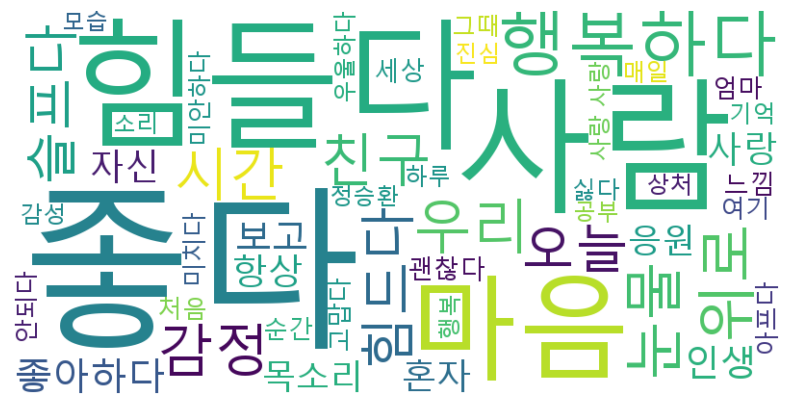

In [79]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from mecab import MeCab
import re

# 🔹 한국어 형태소 분석기 (KoNLPy 사용 가능, 여기선 단순 띄어쓰기 토큰화)
from konlpy.tag import Okt  

# 🔹 한글 폰트 경로 (워드클라우드에서 한글 표시용)
font_path = "malgun.ttf"  # Windows: "malgun.ttf", Mac: "AppleGothic", Linux: 적절한 폰트 지정

# 🔹 nltk 불용어 데이터 다운로드 (최초 1회 실행 필요)
nltk.download("stopwords")
nltk.download("punkt")

# 🔹 한국어 불용어 리스트 (직접 추가 가능)
korean_stopwords = ["이", "그", "저", "의", "가", "을", "를", "은", "는", "에", "한", "하다", "음악", "노래", "진짜", "있다", "없다", "같다",
                   "정말", "그냥", "이제", "조금", "많다", "아니다", "생각", "그렇다", "어떻다", "당신", "다시", "계속", "지금", "이렇다", "때문", "댓글",
                   "한번", "이다", "누구", "모두", "모든", "가수", "가사", "이유", "하나"]

# 🔹 영어 불용어 리스트
stop_words = set(stopwords.words("english"))

# 🔹 텍스트 토큰화 + 전처리 함수
def preprocess_text(text):
    if isinstance(text, float):  # NaN 값 방지
        return []
    
    text = text.lower()  # 소문자로 변환
    text = re.sub(r"http\S+|www\S+", "", text)  # URL 제거
    text = re.sub(r"@\w+|\#", "", text)  # @멘션 및 해시태그 제거
    text = re.sub(r"[^a-zA-Z가-힣\s]", "", text)  # 영문, 한글, 공백 제외한 문자 제거
    text = re.sub(r"\s+", " ", text).strip()  # 연속 공백 제거

    # 🔹 토큰화 (한국어 형태소 분석기 Okt 사용)
    okt = Okt()
    #tokens = okt.morphs(text)  # 형태소 단위 토큰화 (띄어쓰기 기반 단순 토큰화 대신)
    tagged_words = okt.pos(text, stem=True)  # (단어, 품사) 형태로 반환, 동사/형용사 원형 복원
    
    # 🔹 명사(Noun), 형용사(Adjective), 동사(Verb) 필터링
    tokens = [word for word, tag in tagged_words if tag in ["Noun", "Adjective","Exclamation"]]


    # 🔹 불용어 제거
    tokens = [word for word in tokens if word not in stop_words and word not in korean_stopwords and len(word) > 1]

    return tokens

# 🔹 CSV 파일 불러오기
file_path = "./data/유튜브댓글크롤링/잔잔.csv"  # CSV 파일 경로
df = pd.read_csv(file_path)

# 🔹 특정 컬럼에서 텍스트 불러오기
column_name = "text"  # 사용할 컬럼명 (예: 'text', '내용' 등)
df[column_name] = df[column_name].astype(str)  # NaN 값 방지
df["tokens"] = df[column_name].apply(preprocess_text)  # 토큰화 및 전처리 적용

# 🔹 토큰을 공백으로 연결해 하나의 텍스트로 변환 (워드클라우드 입력용)
processed_text = " ".join([" ".join(tokens) for tokens in df["tokens"]])

# 🔹 워드클라우드 생성
wordcloud = WordCloud(font_path=font_path, width=800, height=400, max_words=50, background_color="white").generate(processed_text)

# 🔹 워드클라우드 출력
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
wordcloud.to_file("wordcloud_output1.png")

힙합

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


가장 많이 등장하는 단어 50개:
노래: 386
사람: 196
생각: 133
그냥: 118
듣고: 117
사랑: 107
플리: 105
지금: 99
시간: 97
들어주셔서: 94
이렇게: 79
기분: 77
하는: 75
많이: 74
오늘: 73
친구: 72
이런: 71
음악: 71
좋은: 69
여기: 68
다시: 67
나도: 66
이제: 63
좋아요: 62
혼자: 60
하나: 58
정말: 58
존나: 55
근데: 54
마음: 53
클럽: 51
우리: 51
보고: 51
뭔가: 50
운동: 49
때문: 49
같이: 48
제발: 47
처음: 47
가요: 46
아무: 46
감정: 45
항상: 45
최고: 44
위로: 44
어떤: 44
리스트: 42
같아: 41
외힙: 41
멜론: 40


(-0.5, 799.5, 399.5, -0.5)

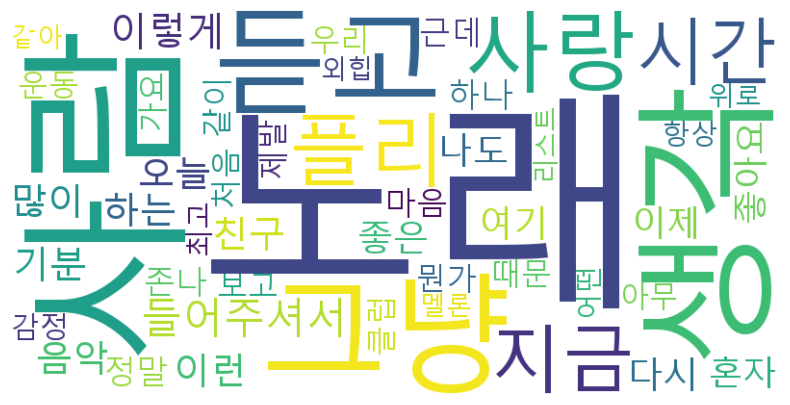

In [83]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Okt  

# 🔹 한글 폰트 경로 (워드클라우드에서 한글 표시용)
font_path = "malgun.ttf"  # Windows: "malgun.ttf", Mac: "AppleGothic", Linux: 적절한 폰트 지정

# 🔹 nltk 불용어 데이터 다운로드 (최초 1회 실행 필요)
nltk.download("stopwords")
nltk.download("punkt")

# 🔹 한국어 불용어 리스트
korean_stopwords = {"한테", "인데", "아비치", "했습니다", "이", "그", "저", "의", "가", "을", "를", "은", "는", "에", "한", "하다",
                    "너무", "감사합니다", "진짜", "으로", "부터", "구독", "에서", "입니다", "해서", "댓글", "제목", "까지", "거", "것", "있는",
                    "합니다", "하고"}

# 🔹 영어 불용어 리스트
stop_words = set(stopwords.words("english"))

# 🔹 텍스트 토큰화 + 전처리 함수
def preprocess_text(text):
    if isinstance(text, float):  # NaN 값 방지
        return []
    
    text = text.lower()  # 소문자로 변환
    text = re.sub(r"http\S+|www\S+", "", text)  # URL 제거
    text = re.sub(r"@\w+|\#", "", text)  # @멘션 및 해시태그 제거
    text = re.sub(r"[^가-힣\s]", "", text)  # 영문, 한글, 공백 제외한 문자 제거
    text = re.sub(r"\s+", " ", text).strip()  # 연속 공백 제거

    # 🔹 토큰화 (한국어 형태소 분석기 Okt 사용)
    okt = Okt()
    tokens = okt.morphs(text)  # 형태소 단위 토큰화

    # 🔹 불용어 제거
    tokens = [word for word in tokens if word not in stop_words and word not in korean_stopwords and len(word) > 1]

    return tokens

# 🔹 CSV 파일 불러오기
file_path = "./data/유튜브댓글크롤링/hiphop.csv"  # CSV 파일 경로
df = pd.read_csv(file_path)

# 🔹 특정 컬럼에서 텍스트 불러오기
column_name = "text"  # 사용할 컬럼명 (예: 'text', '내용' 등)
df[column_name] = df[column_name].astype(str)  # NaN 값 방지
df["tokens"] = df[column_name].apply(preprocess_text)  # 토큰화 및 전처리 적용

# 🔹 모든 토큰을 하나의 리스트로 합치기 (Counter 적용)
all_tokens = [word for tokens in df["tokens"] for word in tokens]
word_counts = Counter(all_tokens)

# 🔹 가장 많이 등장하는 단어 50개 확인
most_common_tokens = word_counts.most_common(50)
print("가장 많이 등장하는 단어 50개:")
for word, count in most_common_tokens:
    print(f"{word}: {count}")

# 🔹 워드클라우드 생성
wordcloud = WordCloud(font_path=font_path, width=800, height=400, background_color="white", max_words=50).generate_from_frequencies(word_counts)

# 🔹 워드클라우드 출력
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")


EDM

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


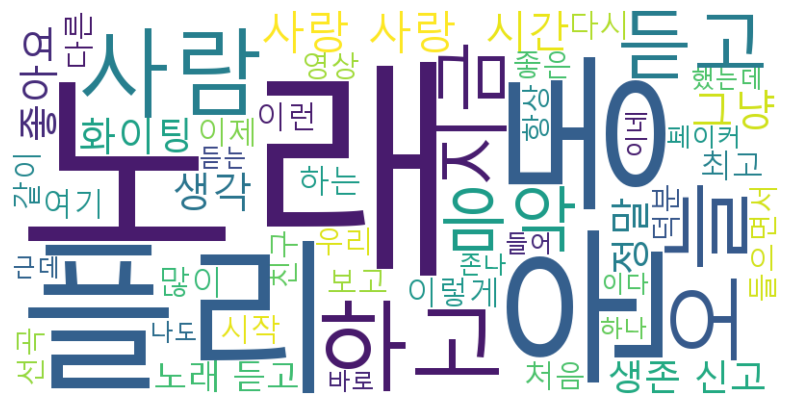

In [84]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

# 🔹 한국어 형태소 분석기 (KoNLPy 사용 가능, 여기선 단순 띄어쓰기 토큰화)
from konlpy.tag import Okt  

# 🔹 한글 폰트 경로 (워드클라우드에서 한글 표시용)
font_path = "malgun.ttf"  # Windows: "malgun.ttf", Mac: "AppleGothic", Linux: 적절한 폰트 지정

# 🔹 nltk 불용어 데이터 다운로드 (최초 1회 실행 필요)
nltk.download("stopwords")
nltk.download("punkt")

# 🔹 한국어 불용어 리스트 (직접 추가 가능)
korean_stopwords = ["한테","인데","아비치","","했습니다","이", "그", "저", "의", "가", "을", "를", "은", "는", "에", "한", "하다","너무","감사합니다","진짜","으로","부터","구독","에서","입니다","해서","댓글","제목","까지","거","것","있는","합니다"]

# 🔹 영어 불용어 리스트
stop_words = set(stopwords.words("english"))

# 🔹 `filtered_words` 생성 (모든 단어 리스트로 변환)
filtered_words = [word for tokens in df["tokens"] for word in tokens]

# 단어 빈도수 계산
word_counts = Counter(filtered_words)

# 부정적인 단어 리스트 (필요 시 추가 가능)
#negative_words = {"시발", "우울", "미친", "탓", "존나", "돈", "미안"}

# 부정적인 단어 강조 (폰트 크기 키우기)
#word_freq = {word: (count * 5 if word in negative_words else count) for word, count in word_counts.items()}



# 🔹 텍스트 토큰화 + 전처리 함수
def preprocess_text(text):
    if isinstance(text, float):  # NaN 값 방지
        return []
    
    text = text.lower()  # 소문자로 변환
    text = re.sub(r"http\S+|www\S+", "", text)  # URL 제거
    text = re.sub(r"@\w+|\#", "", text)  # @멘션 및 해시태그 제거
    text = re.sub(r"[^가-힣\s]", "", text)  # 영문, 한글, 공백 제외한 문자 제거
    text = re.sub(r"\s+", " ", text).strip()  # 연속 공백 제거

    # 🔹 토큰화 (한국어 형태소 분석기 Okt 사용)
    okt = Okt()
    tokens = okt.morphs(text)  # 형태소 단위 토큰화 (띄어쓰기 기반 단순 토큰화 대신)

    # 🔹 불용어 제거
    tokens = [word for word in tokens if word not in stop_words and word not in korean_stopwords and len(word) > 1]

    return tokens

# 🔹 CSV 파일 불러오기
file_path = "./data/유튜브댓글크롤링/EDM.csv"  # CSV 파일 경로
df = pd.read_csv(file_path)

# 🔹 특정 컬럼에서 텍스트 불러오기
column_name = "text"  # 사용할 컬럼명 (예: 'text', '내용' 등)
df[column_name] = df[column_name].astype(str)  # NaN 값 방지
df["tokens"] = df[column_name].apply(preprocess_text)  # 토큰화 및 전처리 적용

# 🔹 토큰을 공백으로 연결해 하나의 텍스트로 변환 (워드클라우드 입력용)
processed_text = " ".join([" ".join(tokens) for tokens in df["tokens"]])

# 🔹 워드클라우드 생성
#wordcloud = WordCloud(font_path=font_path, width=800, height=400, background_color="white",max_words=100).generate(processed_text)
#wordcloud = WordCloud(font_path=font_path, width=800, height=400, background_color="white",max_words=50,colormap='coolwarm').generate_from_frequencies(word_freq)
# 워드 클라우드 생성
# wordcloud = WordCloud(
#     width=800,
#     height=400,
#     background_color='white',
#     colormap='coolwarm'
# ).generate_from_frequencies(word_freq)

# 🔹 워드클라우드 생성
wordcloud = WordCloud(font_path=font_path, width=800, height=400, background_color="white",max_words=50).generate(processed_text)


# 🔹 워드클라우드 출력
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()